In [1]:
# Standard numpy for matrices, vectors, etc..
import numpy as np

# Visualisation (plotting, etc..)
import matplotlib.pyplot as plt
%matplotlib inline

try:
    in_colab = False
    import google.colab
    in_colab = True
except:
    pass

# Use the following to access torch and tensorboard when running on colab
if in_colab:
    !pip install -U torch torchvision torchviz tensorboardcolab
    from tensorboardcolab import *

# New for today! Import PyTorch (refered to by package name torch)
import torch

# This is used for graph visualisation..
from torchviz import make_dot

# Please see the following page for getting
# started guide and tutorials:
# https://pytorch.org/tutorials/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylin

### Standard numpy

Let's start with a simple recap of what we are used to with standard numpy in python..

In [21]:
# What we are used to in standard nummerical programming:

a = np.array([1.0, 2.0, 3.0])

b = np.array([2.0, 2.0, 2.0])

a_plus_b = a + b

a_power_b = a ** b

c = a_plus_b * a_power_b

print('In numpy:')
print('a = ', a)
print('a = ', b)
print('a + b = ', a_plus_b)
print('a ** b = ', a_power_b)
print('c = (a + b) * (a ** b) = ', c)

In numpy:
a =  [1. 2. 3.]
a =  [2. 2. 2.]
a + b =  [3. 4. 5.]
a ** b =  [1. 4. 9.]
c = (a + b) * (a ** b) =  [ 3. 16. 45.]


In [3]:
# Let's do this with pytorch (or just torch):
#
# (Using t_ to denote torch variables - this is optional and just for clarity)
#

t_a = torch.tensor(a)

t_b = torch.tensor(b)

t_a_plus_b = t_a + t_b

t_a_power_b = t_a ** t_b

t_c = t_a_plus_b * t_a_power_b

print('In torch:')
print('a = ', t_a)
print('a = ', t_b)
print('a + b = ', t_a_plus_b)
print('a ** b = ', t_a_power_b)
print('c = (a + b) * (a ** b) = ', t_c)

In torch:
a =  tensor([1., 2., 3.], dtype=torch.float64)
a =  tensor([2., 2., 2.], dtype=torch.float64)
a + b =  tensor([3., 4., 5.], dtype=torch.float64)
a ** b =  tensor([1., 4., 9.], dtype=torch.float64)
c = (a + b) * (a ** b) =  tensor([ 3., 16., 45.], dtype=torch.float64)


### So why would we use torch instead of numpy?

So far, the two seem to operate in the same manner so why do we need torch?

In the background, torch is also builds a computational graph of the operations being performed. This will allow, amongst other things, the graph to be analysed and gradients to be computed automatically by going backwards through the graph applying the differentiation **chain rule** to propagate gradient information.

*Let's see an example in action!*

#### Aside: More information about pytorch autograd:

- [Automatic Differentiation with torch.autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

- [Autograd Mechanics](https://pytorch.org/docs/stable/notes/autograd.html)

In [4]:
# Let's do the same calculation as before but we will tell torch that we would
# like to calculate gradients by using the "requires_grad=True" argument when
# we create the pytorch tensors..

t_a = torch.tensor(a, requires_grad=True)

t_b = torch.tensor(b, requires_grad=True)

t_a_plus_b = t_a + t_b

t_a_power_b = t_a ** t_b

t_c = t_a_plus_b * t_a_power_b

print('t_c = ', t_c)

t_c =  tensor([ 3., 16., 45.], dtype=torch.float64, grad_fn=<MulBackward0>)


### We notice t_c has a new attribute!

If we look the printed output for t_c we notice there is a new piece of information, now t_c has an attribute called "grad_fn".

This indicates that there is a function associated with the tensor to propagate the gradient backward (part of the *computational graph* we mentioned before).

We notice that the grad_fn object is of type **MulBackward** which indicates that this is a function that calculates the gradient through a multiplication operation. We remember that t_c is the result of a multiplication:
`t_c = t_a_plus_b * t_a_power_b`
so we would expect the gradient to require an application of the chain rule via the derivative of a multiplication operation.


In [5]:
# We can visualise the computational graph for all the relevant terms:

print('t_c gradient function = ', t_c.grad_fn)
print('t_a_plus_b gradient function = ', t_a_plus_b.grad_fn)
print('t_a_power_b gradient function = ', t_a_power_b.grad_fn)
print('t_b gradient function = ', t_b.grad_fn)
print('t_a gradient function = ', t_a.grad_fn)

t_c gradient function =  <MulBackward0 object at 0x7b554e1ce0e0>
t_a_plus_b gradient function =  <AddBackward0 object at 0x7b554e1cded0>
t_a_power_b gradient function =  <PowBackward1 object at 0x7b554e1ce0e0>
t_b gradient function =  None
t_a gradient function =  None


We note that when we get to t_a and t_b we no longer have any gradient functions since these are the starting points of the calculation (and not dependent on any other values).

Otherwise, we can see that a gradient function is associated with each operation using a suitable function. So t_a_plus_b has **AddBackward** since it is the result of an addition operation. Equally, t_a_power_b has **PowBackward** since it is the result of taking a to the power of b.

**We can now see these gradient functions in action!** We will now make use of the gradient functions by running the *backward* operation in torch which tells the computational graph to propagate gradients.

Let us calculate the gradients of sum(t_c) wrt t_a and t_b. That is we want
$$
\frac{d s}{d \mathbf{a}} \quad \text{and} \quad \frac{d s}{d \mathbf{b}}
$$
where $s = \sum_i c_i$.

In [6]:
# Create a result to hold the scalar sum
t_s = torch.sum(t_c)

# Propagate gradients for t_s by calling backward..
t_s.backward()

# Now we can read out the gradients..
print('Gradient for t_a (ds/da) = ', t_a.grad)
print('Gradient for t_b (ds/db) = ', t_b.grad)

Gradient for t_a (ds/da) =  tensor([ 7., 20., 39.], dtype=torch.float64)
Gradient for t_b (ds/db) =  tensor([ 1.0000, 15.0904, 58.4376], dtype=torch.float64)


Let's check that these results make sense.

We have the following:
$$
s = \sum_i c_i, \quad c_i = (a_i + b_i) \times {a_i}^{b_i}
$$

Now if we remember our calculus rules, we will need to apply the following identities (we will assume we have functions $a(x)$ and $b(x)$ since we are thinking about *propagating* gradients):
$$
\begin{aligned}
\text{Sum Rule:}&&\quad\frac{d}{dx} (a+b) &= \frac{da}{dx} + \frac{db}{dx}
\\
\text{Product Rule:}&&\quad\frac{d}{dx} (a \times b) &= \frac{da}{dx} \times b + a \times \frac{db}{dx}
\\
\text{Power Rule:}&&\quad\frac{d}{dx} (x^a) &= a \times x^{a - 1}
\end{aligned}
$$
The final exponent rule (needed for t_b) is a little more involved:
$$
\text{Exponent Rule:}\quad\frac{d}{dx} (a^b) =
\frac{d}{dx} (e^{b \ln a}) =
(e^{b \ln a}) \frac{d}{dx} (b \ln a) =
a^b \left( \frac{db}{dx} \ln a + \frac{da}{dx} \frac{b}{a} \right)
$$

So, we can mimic the work of torch for t_a:

$$
\frac{d c_i}{da_i}
  = \frac{d}{da_i} [(a_i + b_i) \times {a_i}^{b_i}]
  = {a_i}^{b_i} \times \left[\frac{d}{da_i} (a_i + b_i)\right]
  + (a_i + b_i) \times \left[\frac{d}{da_i} ({a_i}^{b_i}) \right]
$$
$$
\Rightarrow \frac{d c_i}{da_i}
  = {a_i}^{b_i} + (a_i + b_i) \times (b_i \times {a_i}^{b_i - 1})
$$

**Let's check the pytorch result..**

In [7]:
# Calculate our hand-derived gradient for t_a..

t_dc_da = (t_a ** t_b) + (t_a + t_b) * t_b * (t_a ** (t_b - 1.0))

print('Check t_dc_da = ', t_dc_da)

print('Torch Gradient for t_a = ', t_a.grad)

# Hopefully these two match!!

Check t_dc_da =  tensor([ 7., 20., 39.], dtype=torch.float64, grad_fn=<AddBackward0>)
Torch Gradient for t_a =  tensor([ 7., 20., 39.], dtype=torch.float64)


### So it seems to work!

If you would like you can check the result for t_b as well..

Note: This is a more involved derivation (due to the more complex exponential rule); we can already see that even for our simple calculation, the gradient derivations can get very involved and so hand-calculation is error prone, time consuming and has to be changed with every modification to the original calculation. *The automatic differentiation in torch is really helping out!*

### Why do we need to calculate derivatives?

Well, what if we are doing a (gradient based) optimistion? Let's see a full motivating example..

## Example: fitting the parameters of a distribution

Suppose we want to fit a Gaussian distribution $\mathsf{N}(\mu, \sigma^2)$ to a set of numbers $X = \{ x_0, x_1, \dots, x_{N-1} \}$.

**We know that this fit can actually be calculated directly (one of the nice properties of the Gaussian distribution) but we will pretend that we cannot determine these parameters in closed-form and will perform nummerical optimisation to determine them - this way we can check our results with the analytic solution!**

If we assume the numbers are i.i.d. (indentically and independently distributed) samples from a Gaussian then the likelihood of $X$ is given by:

\begin{align}
p(X) &= p(x_0) \cdot p(x_1) \cdot \dots \cdot p(x_{N-1}) \\
 &= \mathsf{N}(x_0 \,|\, \mu, \sigma^2) \cdot \mathsf{N}(x_1 \,|\, \mu, \sigma^2) \cdot \dots \cdot \mathsf{N}(x_{N-1} \,|\, \mu, \sigma^2) \\
 &= \prod_{n=0}^{N-1} \mathsf{N}(x_{n} \,|\, \mu, \sigma^2) \\
 &= \prod_{n=0}^{N-1} \frac{1}{\sqrt{2\pi\sigma^2}}
    \exp{\left( - \frac{(x_{n} - \mu)^2}{2\sigma^2} \right)}
\end{align}

**Top Tip!** When working with exponential family of distributions it often helps to work in the log domain..

\begin{align}
\log  p(X)  &= \sum_{n=0}^{N-1}
    -\frac{1}{2} \log{\left( 2\pi\sigma^2 \right)}
    -\frac{(x_{n} - \mu)^2}{2\sigma^2}
\end{align}

So, we have the *maximum likelihood* fit to the parameters when we find the values of $\mu$ and $\sigma^2$ that maximise $p(X)$ which (since $\log\,(\cdot)$ is a concave function) occurs at the same time that $\log p(X)$ is maximised.

In our case we can find an analytic solution for

\begin{align}
\mu^{*} &= {\arg\max}_{\mu} \, \log p(X) \\
{\sigma^{*}}^2 &= {\arg\max}_{\sigma^2} \, \log p(X) \\
\end{align}

But let's pretend that the problem was more complicated and we needed to use *optimisation* to solve the problem..

To perform numerical optimisation we need to be able to calculate gradients of the objective function ($\log p(X)$) wrt the parameters that you are optimising ($\mu$ and $\sigma^2$).

*Let's see how to do this in torch..*

In [22]:
# First let's generate some numbers to fit the data to..

# How many values of x?
N = 20

# Pick the real mean and variance..
mu_true = 2.5
sigma_true = 1.5

x_n = np.random.normal(mu_true, sigma_true, N)

np.set_printoptions(precision=3, linewidth=100)
print('X = \n', np.transpose(x_n))

X = 
 [0.884 4.165 0.03  5.279 1.645 2.308 2.365 2.898 0.868 1.62  2.721 3.023 3.93  2.062 0.676 5.51
 1.135 2.444 2.592 3.984]


We are now going to create our implicit torch computation graph but we are going to account for the fact that $\mu$ and $\sigma^2$ are no longer constants since we wish to vary their values to find the maximum of $\log p(X)$. With numerical optimisation, we need to start with a guess for the values of $\mu$ and $\sigma^2$; in this case, we will start with
\begin{align}
\mu_{\mathrm{initial}} &= 1\\
\sigma^2_{\mathrm{initial}} &= 1
\end{align}

**Top Tip!** Care needs to be taken with $\sigma$ since it can only be a positive value (unlike $\mu$ which can be any real number). In general, `torch` variables can be positive or negative. In this example we square the value of `t_sigma` before using it to ensure that `t_sigma_2` is a positive value but we shouldn't, therefore, use the value for `t_sigma` directly in calculations..

As a reminder, we want to find:
\begin{align}
\log  p(X)  &= \sum_{n=0}^{N-1}
    -\frac{1}{2} \log{\left( 2\pi\sigma^2 \right)}
    -\frac{(x_{n} - \mu)^2}{2\sigma^2}
%    \\
%    &=  -\frac{N}{2} \log{\left( 2\pi\sigma^2 \right)}
%    - \frac{1}{2\sigma^2} \sum_{n=0}^{N-1}\left(x_{n} - \mu\right)^2
\end{align}

In [9]:
# Our initial guesses..
mu_initial_guess = 1.0
sigma_initial_guess = np.sqrt(1.0)

# The data to fit to (NOTE: this is our constant data so no gradients required)
t_x_n = torch.tensor(x_n)

# Note: mu and sigma are now *variables* not constants!
# We need to specify their data type and initial value..
t_mu = torch.tensor(mu_initial_guess, requires_grad=True)
t_sigma = torch.tensor(sigma_initial_guess, requires_grad=True)

# Note: this step is important - don't use t_sigma directly!!
t_sigma_2 = t_sigma ** 2.0

# Calculate log p(X) terms..

t_x_minus_mu_2 = (t_x_n - t_mu) ** 2.0
t_denom = 2.0 * t_sigma_2
t_sigma_term = - 0.5 * torch.log(2.0 * np.pi * t_sigma_2)

t_log_P_terms = t_sigma_term - (t_x_minus_mu_2 / t_denom)

# The sum is performed by a reduction in torch
# (since a vector goes in and a scalar comes out)
# but this is effectively the same as np.sum(...)
t_log_P = torch.sum(t_log_P_terms)

In [10]:
# Let's just check that we calculated things correctly:

print('Torch log p(X) = ', t_log_P)
print('(using initial guesses for mu and sigma)\n')

# Check with scipy..
from scipy.stats import norm
check_value = np.sum(norm.logpdf(x_n,
                                 mu_initial_guess,
                                 sigma_initial_guess))
print('Value from scipy stats package = ', check_value)

# Check these are close (to nummerical precision - remember not to use
# equality when checking floating point numbers due to round-off error)..
assert(np.isclose(t_log_P.detach().numpy(), check_value))

print('\nEverything working!')

Torch log p(X) =  tensor(-68.4921, dtype=torch.float64, grad_fn=<SumBackward0>)
(using initial guesses for mu and sigma)

Value from scipy stats package =  -68.4921329611185

Everything working!


**NOTE:** torch.tensor values are not the same as numpy.arrays and so when passing torch values into numpy functions (as illustrated in the np.isclose call above). If we have a value that is currently associated with a computational graph to calculate the gradient then we must also create a copy first by detaching it from the graph, hence the use of
`t_log_P.detach().numpy()`


### This is great, but what if we want to use different parameter values?

Well, we need to put our torch code into a function so that we can call it with different values. Let's put the code from above into a function:

In [11]:
# Create the log likelihood function taking the data and parameters as arguments
def torch_gaussian_log_likelihood(t_x_n, t_mu, t_sigma):
    # Note: this step is important - don't use t_sigma directly!!
    t_sigma_2 = t_sigma ** 2.0

    # Calculate log p(X) terms..

    t_x_minus_mu_2 = (t_x_n - t_mu) ** 2.0
    t_denom = 2.0 * t_sigma_2
    t_sigma_term = - 0.5 * torch.log(2.0 * np.pi * t_sigma_2)

    t_log_P_terms = t_sigma_term - (t_x_minus_mu_2 / t_denom)

    # The sum is performed by a reduction in torch
    # (since a vector goes in and a scalar comes out)
    # but this is effectively the same as np.sum(...)
    t_log_P = torch.sum(t_log_P_terms)

    return t_log_P


# Let's check again..
print('Torch log p(X) = ', torch_gaussian_log_likelihood(t_x_n, t_mu, t_sigma))
print('(using initial guesses for mu and sigma)\n')

print('Value from scipy stats package = ', check_value)

Torch log p(X) =  tensor(-68.4921, dtype=torch.float64, grad_fn=<SumBackward0>)
(using initial guesses for mu and sigma)

Value from scipy stats package =  -68.4921329611185


### So now let's use the power of pytorch!!

To perform optimisation we need to know the gradient of the log likelihood with respect to the particular parameters $\mu$ and $\sigma$.

We know how to find these with torch using the backward from above!

In [12]:
t_log_P = torch_gaussian_log_likelihood(t_x_n, t_mu, t_sigma)

t_log_P.backward()

print('Gradient wrt mu = ', t_mu.grad)
print('Gradient wrt sigma = ', t_sigma.grad)

Gradient wrt mu =  tensor(30.9592)
Gradient wrt sigma =  tensor(80.2267, dtype=torch.float64)


Shall we check that result. Remember we have:

\begin{align}
\log  p(X)  &= \sum_{n=0}^{N-1}
    -\frac{1}{2} \log{\left( 2\pi\sigma^2 \right)}
    -\frac{(x_{n} - \mu)^2}{2\sigma^2} \\
    &=  -\frac{N}{2} \log{\left( 2\pi\sigma^2 \right)}
    - \frac{1}{2\sigma^2} \sum_{n=0}^{N-1}\left(x_{n} - \mu\right)^2
\end{align}

So for $\mu$ we have:

\begin{align}
\frac{\partial \log  p(X)}{\partial \mu}   
    &= - 0
    - \frac{1}{2\sigma^2} \frac{\partial}{\partial \mu}  \sum_{n=0}^{N-1} \left(x_{n} - \mu\right)^2 \\
    &= - \frac{1}{2\sigma^2} \sum_{n=0}^{N-1} \frac{\partial}{\partial \mu} \left(x_{n} - \mu\right)^2 \\
    &= - \frac{1}{2\sigma^2} \sum_{n=0}^{N-1} 2 \left(x_{n} - \mu\right) \frac{\partial}{\partial \mu}\left(x_{n} - \mu\right)  \\
    &= \frac{1}{\sigma^2} \sum_{n=0}^{N-1} \left(x_{n} - \mu\right)
\end{align}

where we used the chain rule a number of times..

In [13]:
# numpy check of gradient wrt mu

grad_mu_check = np.sum(x_n - mu_initial_guess) / \
                (sigma_initial_guess ** 2)

print('Our analytic gradient wrt mu = ', grad_mu_check)

print('Torch gradient wrt mu = ', t_mu.grad)

assert(np.isclose(t_mu.grad.detach().numpy(), grad_mu_check))

print('\nExcellent! torch calculated the gradient for us :)')

Our analytic gradient wrt mu =  30.959211408943794
Torch gradient wrt mu =  tensor(30.9592)

Excellent! torch calculated the gradient for us :)


## Everyone should now be in awe!

This might seem like something trivial but hopefully you can see that actually quite a lot of maths and then coding went into determining the gradient.

In fact, you can do the same to check the value for the gradient wrt $\sigma^2$.

When we calculated the result using the chain rule. Since torch built up a graph of the operations, it is able to apply the chain rule results for us automatically.

This:
\begin{align}
\log  p(X)  &= \sum_{n=0}^{N-1}
    -\frac{1}{2} \log{\left( 2\pi\sigma^2 \right)}
    -\frac{(x_{n} - \mu)^2}{2\sigma^2}
%    \\
%    &=  -\frac{N}{2} \log{\left( 2\pi\sigma^2 \right)}
%    - \frac{1}{2\sigma^2} \sum_{n=0}^{N-1}\left(x_{n} - \mu\right)^2
\end{align}
has become a computational graph.

For example, the `pow` operation represents $r = a^b$ for the inputs $a,b$ and result $r$. As above, torch then knows that $\frac{\partial r}{\partial a} = b a^{b-1}$, and by chaining these operations together it can work backwards through the graph (from $\log p(X)$ at the top to $\mu$ at the bottom) to calculate the gradient.

Therefore, the procedure when operating with torch is always the same. A **forward pass** can calculate the objective for the current set of parameters and then a **backwards pass** can calculate the gradients of an objective wrt any of the parameters.

## Simple gradient descent using these gradients..

Let's use simple gradient descent to try to fit the values of our parameters to our data. Essentially, we start with some initial values and take a "step" in the direction of the (downhill) gradient in order to minimise the objective.

In our case, the parameters that we want will maximise the log likelihood so the objective function we must use is to minimise the **negative** log likelihood.

So the update rule will be:
$$
\mu^{(k+1)} = \mu^{(k)} - \eta \frac{\partial}{\partial \mu} \log p(\mathbf{x})
$$
where $\eta$ is some (small) step size and $k$ is the iteration index.

Let us try to do this loop a few times:

In [23]:
number_of_iterations = 50
step_size_eta = 1.0e-2

# The data to fit to (NOTE: this is our constant data so no gradients required)
t_x_n = torch.tensor(x_n)

# Note: mu and sigma are now *variables* not constants!
# We need to specify their data type and initial value..
t_mu = torch.tensor(mu_initial_guess, requires_grad=True)
t_sigma = torch.tensor(sigma_initial_guess, requires_grad=True)

for iteration in range(number_of_iterations + 1):
    # Perform the forward pass, calculate - log p(x)
    t_neg_log_likelihood = -1.0 * torch_gaussian_log_likelihood(t_x_n, t_mu, t_sigma)

    # Perform the backwards pass to get the gradients
    t_neg_log_likelihood.backward()

    # Temporarily disable gradient computations so that we can update the
    # parameter values (we don't want to differentiate the update!)..
    with torch.no_grad():
        # Update the parameters based on the step size..
        t_mu -= step_size_eta * t_mu.grad
        t_sigma -= step_size_eta * t_sigma.grad

        # IMPORTANT: Clear the gradients for next time..
        t_mu.grad.data.zero_()
        t_sigma.grad.data.zero_()

    # Print out the current values
    if iteration % 10 == 0:
        print('Iter %04d, NLL %0.2e, mu %.4f, sigma %.4f' %
              (iteration, t_neg_log_likelihood.detach().numpy(), t_mu, t_sigma))


print('\nAfter optimisation:')
print('Torch mu = ', t_mu)
print('Torch sigma = ', t_sigma)

print('\nAnalytic estimates:')
print('Estimated mu = ', np.mean(x_n))
print('Estimated std = ', np.std(x_n))

print('\nGround truth values:')
print('True mu = ', mu_true)
print('True sigma = ', sigma_true)

Iter 0000, NLL 6.24e+01, mu 1.3014, sigma 1.6803
Iter 0010, NLL 3.78e+01, mu 1.9082, sigma 1.6846
Iter 0020, NLL 3.64e+01, mu 2.2366, sigma 1.5469
Iter 0030, NLL 3.60e+01, mu 2.3990, sigma 1.4806
Iter 0040, NLL 3.60e+01, mu 2.4661, sigma 1.4635
Iter 0050, NLL 3.59e+01, mu 2.4917, sigma 1.4602

After optimisation:
Torch mu =  tensor(2.4917, requires_grad=True)
Torch sigma =  tensor(1.4602, dtype=torch.float64, requires_grad=True)

Analytic estimates:
Estimated mu =  2.5070199462302023
Estimated std =  1.4595466199983618

Ground truth values:
True mu =  2.5
True sigma =  1.5


## Great - we can run an optimisation that automatically calculates the gradients!

So we now have everything coming together to perform a nummerical optimisation where we can perform gradient descent without having to write any code to calculate the gradients ourselves (yay!!).

The final stage is that there were a few technical gotchas in there around dealing with the parameter gradients and updating them (i.e. we had to temporaily suspend gradient calculation and ensure that we zeroed the gradient datastructures for each parameter.

Torch provides a nicer way to modularise this process into an object (or class) in python that provides a nicer interfact. Each module has a set of parameters to be optimised and a forward operation to be performed on data. The autograd operations will then take care of performing the backward operation and an optimiser can be called to control how the parameters are updated (e.g. something more complicated than simple gradient descent).

Let's wrap up our code in this interface.


## Putting models into modules..

Torch has a paradigm to make this procedure easy to work with based on deriving your own class based on a `module` that keeps parameters and the forward pass of the model together to allow easy optimisation.

In [15]:
# Create our own class derived from the torch module..
class MaximumLikelihoodGaussianModel(torch.nn.Module):
    # We must initialise our model - we specify our initial guesses for the
    # parameters..
    def __init__(self, mu_initial_guess, sigma_initial_guess):
        # Call the constructor for the torch.nn.Module super class..
        super().__init__()

        # We use the Parameter class (rather than tensors) for the module
        # but these behave in the same way..
        self.t_mu = torch.nn.Parameter(torch.tensor(mu_initial_guess))
        self.t_sigma = torch.nn.Parameter(torch.tensor(sigma_initial_guess))

    # This defines the forward operation on some data passed in
    def forward(self, t_x_n):

        # We will copy in the code from torch_gaussian_log_likelihood..

        # Note: this step is important - don't use t_sigma directly!!
        t_sigma_2 = self.t_sigma ** 2.0

        # Calculate log p(X) terms..

        t_x_minus_mu_2 = (t_x_n - self.t_mu) ** 2.0
        t_denom = 2.0 * t_sigma_2
        t_sigma_term = - 0.5 * torch.log(2.0 * np.pi * t_sigma_2)

        t_log_P_terms = t_sigma_term - (t_x_minus_mu_2 / t_denom)

        # The sum is performed by a reduction in torch
        # (since a vector goes in and a scalar comes out)
        # but this is effectively the same as np.sum(...)
        t_log_P = torch.sum(t_log_P_terms)

        # Remember to take the negative to return the negative log likelihood..
        return -1.0 * t_log_P

### Now we can optimise our custom module

We can now use the standard optimisation approach for torch using our custom module. The steps are:
- Define an instance of our module
- Define an optimiser
- Loop for each iteration:
    - Zero the gradients
    - Perform the forward pass
    - Perform the backward pass
    - Take an optimiser step

In [24]:
number_of_iterations = 50
# Note the step size is also referred to as the learning rate..
learning_rate = 1.0e-2

# The data to fit to (NOTE: this is our constant data so no gradients required)
t_x_n = torch.tensor(x_n)

# Create our model - it will initialise the paramters appropriately
gaussian_model = MaximumLikelihoodGaussianModel(mu_initial_guess, sigma_initial_guess)
gaussian_model.train()

# Create an optimiser for our model, the model has a datastructure of all
# the parameters to optimise that we will pass in (along with the learning rate)
optimizer = torch.optim.SGD(gaussian_model.parameters(), lr=learning_rate)

for iteration in range(number_of_iterations + 1):
    # Perform the forward pass by calling the model with the data..
    t_neg_log_likelihood = gaussian_model(t_x_n)

    # Clear the gradients..
    optimizer.zero_grad()

    # Perform the backwards pass to calculate the gradients..
    t_neg_log_likelihood.backward()

    # Update the parameters via the optimiser..
    optimizer.step()

    # Print out the current values
    if iteration % 10 == 0:
        print('Iter %04d, NLL %0.2e, mu %.4f, sigma %.4f' %
              (iteration, t_neg_log_likelihood.item(),
               gaussian_model.t_mu, gaussian_model.t_sigma))


print('\nAfter optimisation:')
print('Torch mu = ', gaussian_model.t_mu.item())
print('Torch sigma = ', gaussian_model.t_sigma.item())

print('\nAnalytic estimates:')
print('Estimated mu = ', np.mean(x_n))
print('Estimated std = ', np.std(x_n))

print('\nGround truth values:')
print('True mu = ', mu_true)
print('True sigma = ', sigma_true)

Iter 0000, NLL 6.24e+01, mu 1.3014, sigma 1.6803
Iter 0010, NLL 3.78e+01, mu 1.9082, sigma 1.6846
Iter 0020, NLL 3.64e+01, mu 2.2366, sigma 1.5469
Iter 0030, NLL 3.60e+01, mu 2.3990, sigma 1.4806
Iter 0040, NLL 3.60e+01, mu 2.4661, sigma 1.4635
Iter 0050, NLL 3.59e+01, mu 2.4917, sigma 1.4602

After optimisation:
Torch mu =  2.4916980266571045
Torch sigma =  1.4602219137654822

Analytic estimates:
Estimated mu =  2.5070199462302023
Estimated std =  1.4595466199983618

Ground truth values:
True mu =  2.5
True sigma =  1.5


### Great - let's visualise our working model..

Our new torch module allows us to perform the optimisation of our parameters using a standard approach (we can change the model and the rest of the code is unaltered).

**We can also visualise the computational graph created by our model with the follow code:**

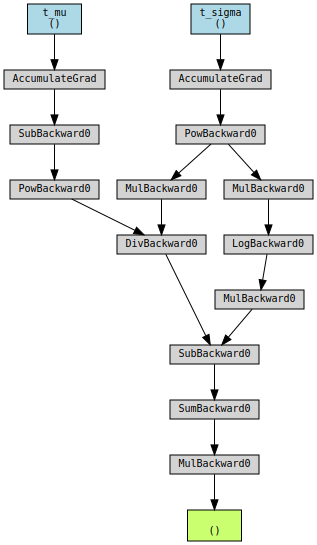

In [17]:
make_dot(gaussian_model(t_x_n), params=dict(gaussian_model.named_parameters()))

This shows us all the functions we would have to have implemented in order to calculate the gradients in the backward pass - we got all these for free using torch instead of numpy!!

## But the fun doesn't end here!

We can now run the same code again with different data just by changing the data we pass in to the model. This is how minibatching can be performed where we use a different subset of the data at each iteration (if we have very large datasets) to estimate the gradients to perform **stochastic gradient descent**.

Let's try with a larger dataset..

#### More information on dataset loading:

[Datasets and Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [27]:
N_bigger = 1000

number_of_iterations = 50
# Note the step size is also referred to as the learning rate..
learning_rate = 1.0e-3

x_bigger = np.random.normal(mu_true, sigma_true, N_bigger)
t_x_n = torch.tensor(x_bigger)

# Create our model - it will initialise the paramters appropriately
gaussian_model = MaximumLikelihoodGaussianModel(mu_initial_guess, sigma_initial_guess)
gaussian_model.train()

# Create an optimiser for our model, the model has a datastructure of all
# the parameters to optimise that we will pass in (along with the learning rate)
optimizer = torch.optim.SGD(gaussian_model.parameters(), lr=learning_rate)

print([a for a in gaussian_model.parameters()])

for iteration in range(number_of_iterations + 1):
    # Perform the forward pass by calling the model with the data..
    t_neg_log_likelihood = gaussian_model(t_x_n)

    # Clear the gradients..
    optimizer.zero_grad()

    # Perform the backwards pass to calculate the gradients..
    t_neg_log_likelihood.backward()

    # Update the parameters via the optimiser..
    optimizer.step()

    # Print out the current values
    if iteration % 10 == 0:
        print('Iter %04d, NLL %0.2e, mu %.4f, sigma %.4f' %
              (iteration, t_neg_log_likelihood.item(),
               gaussian_model.t_mu, gaussian_model.t_sigma))


print('\nAfter optimisation:')
print('Torch mu = ', gaussian_model.t_mu.item())
print('Torch sigma = ', gaussian_model.t_sigma.item())

print('\nAnalytic estimates:')
print('Estimated mu = ', np.mean(x_n))
print('Estimated std = ', np.std(x_n))

print('\nGround truth values:')
print('True mu = ', mu_true)
print('True sigma = ', sigma_true)

[Parameter containing:
tensor(1., requires_grad=True), Parameter containing:
tensor(1., dtype=torch.float64, requires_grad=True)]
Iter 0000, NLL 3.30e+03, mu 2.5742, sigma 4.7542
Iter 0010, NLL 2.09e+03, mu 2.5742, sigma 2.5471
Iter 0020, NLL 1.83e+03, mu 2.5742, sigma 1.5087
Iter 0030, NLL 1.83e+03, mu 2.5742, sigma 1.5087
Iter 0040, NLL 1.83e+03, mu 2.5742, sigma 1.5087
Iter 0050, NLL 1.83e+03, mu 2.5742, sigma 1.5087

After optimisation:
Torch mu =  2.5741844177246094
Torch sigma =  1.5086874747771968

Analytic estimates:
Estimated mu =  2.5070199462302023
Estimated std =  1.4595466199983618

Ground truth values:
True mu =  2.5
True sigma =  1.5


## All sorts of more advanced topics

- Visualise parts of computation (e.g. Tensorboard)
- Reusable components (e.g. modules for neural networks / classifiers / etc..)
- Run computations on the GPU instead of the CPU (often faster)
- Easy to scale; can distribute computations over an entire cluster!

#### More references:

[PyTorch Tutorials](https://pytorch.org/tutorials/index.html)

[PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)